## Linear Congruential Generator

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def lcg(n):
    """
    n: number of prns
    """
    
    a = 1664525
    c = 1013904223
    m = 2**32
    prns = np.zeros(n + 1)
        
    for i in range(n):
        prns[i + 1] = (a * prns[i] + c) % m

    return prns[1:] / m

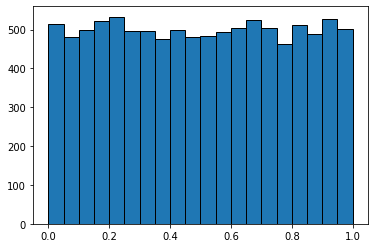

In [3]:
plt.hist(lcg(10000), bins=20, edgecolor='black')
plt.show()

# Inverse Transform Sampling For Exponential Function
Probability density function: $\rho(x) = \lambda e^{-\lambda x}$

Cumulative distribution function (CDF): $1 - e^{-\lambda x}$

Inverse CDF: $\frac{1}{\lambda} \ln (1 - y)$

In [22]:
def icdf_exp(y):
    return np.log(1 - y) / 0.5

unif_nums = lcg(10000)
exp_nums = [icdf_exp(y) for y in unif_nums]

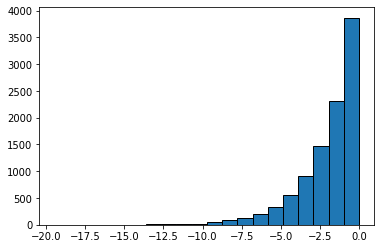

In [23]:
plt.hist(exp_nums, bins=20, edgecolor='black')
plt.show()

# Inverse Transform Sampling For Coin Toss Noise
Consider the biased coin that lands heads (0) and tails (1) with probability $\frac{1}{2}$. Here, we implement the inverse CDF approach to sampling from 2, 3, 4 and 5 coin tosses.

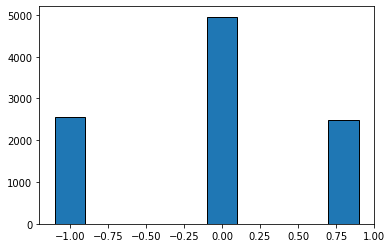

In [27]:
def two_coins(y):
    if y >= 0 and y < 0.25:
        return -1.
    elif y >= 0.25 and y < 0.75:
        return 0.
    else:
        return 1.
    
coin_toss = [two_coins(y) for y in unif_nums]
plt.hist(coin_toss, edgecolor='black', align='left')
plt.show()

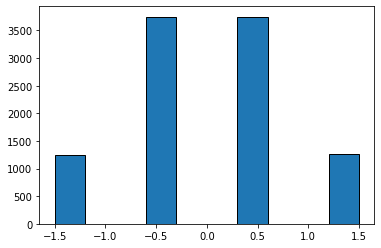

In [26]:
def three_coins(y):
    if y >= 0 and y < 0.125:
        return -1.5
    elif y >= 0.125 and y < 0.5:
        return -0.5
    elif y >= 0.5 and y < 0.875:
        return 0.5
    else:
        return 1.5
    
coin_toss = [three_coins(y) for y in unif_nums]
plt.hist(coin_toss, edgecolor='black', align='mid')
plt.show()

## Non-normalized Linear Congruential Generator

In [214]:
def modified_lcg(n, n_bits=3):
    """
    n: number of prns
    n_bit: number of bits to keep from the prns
    """
    
    a = 1664525
    c = 1013904223
    m = 2**32
    prns = np.zeros(n + 1)
        
    for i in range(n):
        prns[i + 1] = (a * prns[i] + c) % m

    n_bit_prns = [int(bin(int(prn))[2:][(-n_bits):], 2) for prn in prns[1:]]
    return n_bit_prns

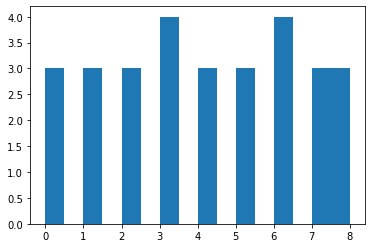

In [216]:
plt.hist(modified_lcg(200, 6), bins=np.linspace(0, 8, 17))
plt.show()

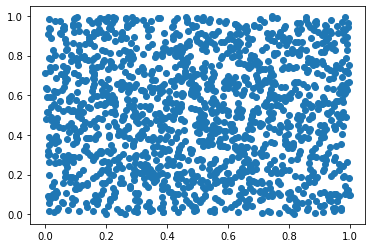

In [217]:
prns = lcg(1500)
x = prns[:-1]
y = prns[1:]
plt.scatter(x, y)
plt.show()

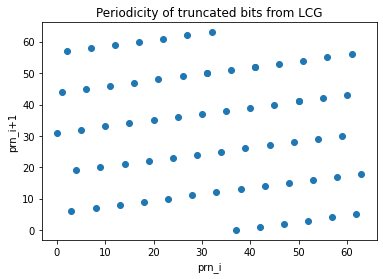

In [218]:
prns = modified_lcg(68, 6)
x = prns[:-1]
y = prns[1:]
plt.scatter(x, y)
plt.xlabel('prn_i')
plt.ylabel('prn_i+1')
plt.title('Periodicity of truncated bits from LCG')
plt.show()

In [99]:
def modified_three_coins(y):
    if y == 0:
        return -1.5
    elif y == 1 or y == 2 or y == 3:
        return -0.5
    elif y == 4 or y == 5 or y == 6:
        return 0.5
    elif y == 7: 
        return 1.5

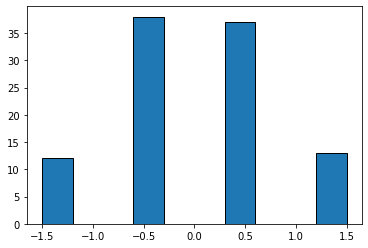

In [100]:
coin_toss = [modified_three_coins(y) for y in modified_lcg(n=100, n_bits=3)]
plt.hist(coin_toss, edgecolor='black', align='mid')
plt.show()

## Truncated Gaussians For 3 Coins

In [132]:
a = np.array([-1.5, -0.5, 0.5, 1.5])

In [133]:
b = np.exp(-a**2 / 2) / np.sqrt(2 * np.pi)
c = b / np.sum(b)
c

array([0.13447071, 0.36552929, 0.36552929, 0.13447071])

In [134]:
three_coin_binomial_noise = np.array([0.125, 0.375, 0.375, 0.125])

In [135]:
np.sum(three_coin_binomial_noise), np.sum(c)

(1.0, 1.0)

In [136]:
0.5 * np.sqrt(3)

0.8660254037844386

## Truncated Gaussians For 4 Coins

In [137]:
a = np.array([-2, -1, 0, 1, 2])
b = np.exp(-a**2 / 2) / np.sqrt(2 * np.pi)
c = b / np.sum(b)
c

array([0.05448868, 0.24420134, 0.40261995, 0.24420134, 0.05448868])

In [138]:
four_coin_binomial_noise = np.array([1./16, 1./4, 3./8, 1./4, 1./16])
four_coin_binomial_noise

array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625])

In [139]:
0.5 * np.sqrt(4)

1.0

In [225]:
def lcg(n):
    """
    n: number of prns
    """
    
    a = 5
    c = 0
    m = 7
    prns = np.zeros(n + 1)
    prns[0] = 4
        
    for i in range(n):
        prns[i + 1] = (a * prns[i] + c) % m

    return prns

lcg(10)

array([4., 6., 2., 3., 1., 5., 4., 6., 2., 3., 1.])

In [227]:
1/7.

0.14285714285714285